#SHDOM single-scattering adjoint

This folder conatains the most recent (3 May 2015) single-scattering adjoint calculations from frank.  


>This has the log output files (.log), radiance output files (.arad),
and optical property adjoint files (.adj) for the "true" and "guess"
cases. The first set of output is for the single scattering forward radiance calculations

    >>les0822nh15t13y135_ocaer1_w0.646_ns1true.*,
    
    >>les0822nh15t13y135_ocaer1_w0.646_ns1guess.*,

>and the second set of outputs is for the full multiple scattering forward radiance calculations,

    >>les0822nh15t13y135_ocaer1_w0.646_ns1true2.*,

    >>les0822nh15t13y135_ocaer1_w0.646_ns1guess2.*.


The cloud field used in these simulations is a 2D slice taken at $y_{(i_y=135)}=8.375 \mathrm{km}$ of the 320x320 high resolution simulation shown below. 

![The Reflectance](../data-adjoint2/les0822nh15t13_aer008_w0.646a_idir01.jpg)

The adjoint calculation is for the gradient of the misfit function, 

\begin{align}
\frac{\partial \Phi(\sigma, \omega)}{\partial(\sigma)} &= \left < \Delta p, \mathcal{U}_{\sigma}[\Delta f] \right >
\end{align}

Only the first order of scattering completed so the results are approximate.  In the calculation labelled "1" the forward and adjoint calculations are only single-scattering.  In the calculation labelled "2", the Forward calculation includes multiple scatterng while the adjoint does not.  


In [1]:
%pylab inline

# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import pandas as pd



Populating the interactive namespace from numpy and matplotlib


In [2]:
# Utility functions

def print_head(fname, Nlines=10, indent="\t"):
    "Print the head of the file."
    
    # Print a message and then the first N lines
    print("Showing head: {}".format(fname))
    for i, line in zip(range(Nlines), open(fname, 'r')):
        print(indent + line.strip())
        
    print('\n')
    

In [3]:
ls

adjoint-derivative-single-scattering.jpg
adjoint-extinction-difference-and residual.jpg
adjoint-extinction-difference-and-residual.jpg
exploring_adjoint.ipynb
exploring_adjoint_with_aerosol.ipynb
les0822nh15t13y135_ocaer1_w0.646_ns1guess2.adj
les0822nh15t13y135_ocaer1_w0.646_ns1guess2.arad
les0822nh15t13y135_ocaer1_w0.646_ns1guess2.log
les0822nh15t13y135_ocaer1_w0.646_ns1true2.adj
les0822nh15t13y135_ocaer1_w0.646_ns1true2.arad
les0822nh15t13y135_ocaer1_w0.646_ns1true2.log
les0822nh15t13y135_w0.646_ns1guess2.adj
les0822nh15t13y135_w0.646_ns1guess2.arad
les0822nh15t13y135_w0.646_ns1guess2.log
les0822nh15t13y135_w0.646_ns1true2.adj
les0822nh15t13y135_w0.646_ns1true2.arad
les0822nh15t13y135_w0.646_ns1true2.log


# Looking at the data files

In [4]:
# The log file
flog = "les0822nh15t13y135_w0.646_ns1true2.log"
print_head(flog, Nlines=10)

# The radiance file
frad = "les0822nh15t13y135_w0.646_ns1true2.arad"
print_head(frad, Nlines=25)

# The adjoint file
fadj_true = "les0822nh15t13y135_w0.646_ns1true2.adj"
fadj = "les0822nh15t13y135_w0.646_ns1guess2.adj"

    
print_head(fadj, Nlines=35)

# The adjoint Radiance file
farad = "les0822nh15t13y135_w0.646_ns1guess2.arad"
farad_true = "les0822nh15t13y135_w0.646_ns1true2.arad"
print_head(farad, Nlines=35)

Showing head: les0822nh15t13y135_w0.646_ns1true2.log
	
	Name of this SHDOMADJ run:
	les0822nh15t13y135_w0.646_ns1true2
	Input particle properties filename (or NONE for Rayleigh only)
	les0822nh15t13y135t.part
	Number of input scattering tables
	2
	Name of each scattering table
	water_w0.646.scat
	aero_oc_w0.646.scat


Showing head: les0822nh15t13y135_w0.646_ns1true2.arad
	! Polarized Spherical Harmonic Discrete Ordinate Radiative Transfer Radiance Output
	!  L= 15  M= 15  NLM=  256   NMU= 16  NPHI= 32  NANG=  354   NSH=   1767876
	!  NSTOKES=1   NX= 320   NY=   1   NZ=  83    NPTS=   36044   NCELLS=   42046
	!  PARTICLE_FILE=les0822nh15t13y135t.part
	!  CORRELATED_K-DIST_FILE=NONE   NUM_G= 1
	!  SOURCE_TYPE=SOLAR               DELTA-M METHOD
	!  GRID_TYPE=EVEN (X,Y)    PROPERTY-FILE (Z)    INDEPENDENT_PIXEL=2
	!  SURFACE_TYPE=FIXED LAMBERTIAN         HORIZ_BOUNDARY_COND=0
	!  GROUND_ALBEDO=0.0500000  SKY_RAD= 0.00000E+00
	!  SOLAR_FLUX= 0.100000E+01   SOLAR_MU=-0.9221000   SOLAR_AZ= 33

In [7]:
# Load the adjoint files into memory
adj_frame = pd.read_csv(fadj, quoting=3, delim_whitespace=True, skiprows=2)
adj_true_frame = pd.read_csv(fadj_true, quoting=3, delim_whitespace=True, skiprows=2)
adj_arad_frame = pd.read_csv(farad, quoting=3, delim_whitespace=True, skiprows=19)
adj_arad_true_frame = pd.read_csv(farad_true, quoting=3, delim_whitespace=True, skiprows=19)
    
    
# Get variables from the array
nx = adj_frame['X'].unique().size
nz = adj_frame["Z"].unique().size


# Get the guess case adjoint field properties
adj_x = np.array(adj_frame["X"], dtype='f8').reshape(nx, nz)
adj_z = np.array(adj_frame["Z"], dtype='f8').reshape(nx, nz)
adj_ext = np.array(adj_frame["Extinct"], dtype='f8').reshape(nx, nz)
adj_alb = np.array(adj_frame["SSalbedo"], dtype='f8').reshape(nx, nz)
adj_dMFdext = np.array(adj_frame["dMF/dExt"], dtype='f8').reshape(nx, nz)
adj_dMFdalb = np.array(adj_frame["dMF/dSSalb"], dtype='f8').reshape(nx, nz)

# Get the True case adjoint extinction field
adj_ext_true = np.array(adj_true_frame["Extinct"], dtype='f8').reshape(nx, nz) 

# Define the adjoint radiance parameters
adj_arad = np.array(adj_arad_frame['RADIANCE'], dtype='f8').reshape(nx)
adj_arad_true = np.array(adj_arad_true_frame['RADIANCE'], dtype='f8').reshape(nx)




In [8]:
# Check the sign of dMF/dExt for Z near the top of the atmosphere
adj_frame[abs(adj_frame["Z"]-15) < .2]

,X,Y,Z,Extinct,SSalbedo,dMF/dExt,dMF/dSSalb,dMF/dP(Theta_j)
82,0.0000,0,15,0.00107,1,-5.7630,-0.007303,-0.066900
165,0.0625,0,15,0.00107,1,-5.4040,-0.006903,-0.063240
248,0.1250,0,15,0.00107,1,-4.5590,-0.005521,-0.050580
331,0.1875,0,15,0.00107,1,-6.1260,-0.007638,-0.069970
414,0.2500,0,15,0.00107,1,-6.7710,-0.008555,-0.078370
497,0.3125,0,15,0.00107,1,-6.5720,-0.008433,-0.077250
580,0.3750,0,15,0.00107,1,-5.7130,-0.007453,-0.068280
663,0.4375,0,15,0.00107,1,-4.9960,-0.006468,-0.059250
746,0.5000,0,15,0.00107,1,-3.4130,-0.004334,-0.039710
829,0.5625,0,15,0.00107,1,-2.9250,-0.003888,-0.035620


In [9]:
# Plot uniformity parameters
H = 20 #5.5   # top of the atmosphere plots
mask_clouds = (adj_ext>= .75e-5) #* (adj_z <= 2.83)
cloud_outline = (adj_ext>= .75e-1) #* (adj_z <= 2.83)


# Scaling of the verticle coordinate 

Zscale = adj_z[0,:]
DZscale = 0 * Zscale
DZscale_other = 0 * Zscale
DZscale[:-1] += 1 / (Zscale[1:] - Zscale[:-1])
DZscale_other[1:] += 1 / (Zscale[1:] - Zscale[:-1])

alpha = .99725
DZscale = alpha * DZscale + (1-alpha) * DZscale_other



# Compute the residual
adj_residual = adj_arad_true - adj_arad



<matplotlib.colorbar.Colorbar instance at 0x4a63ab8>

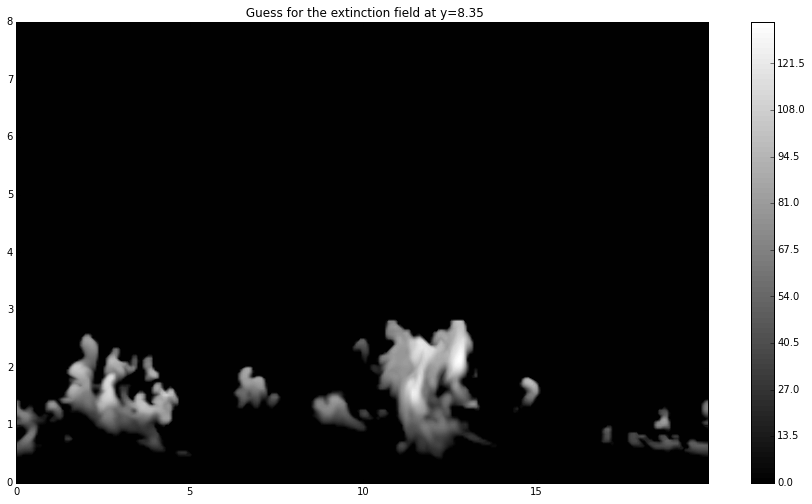

In [10]:
# Make a figure to plot the true extinction field
f0 = plt.figure(0, (15,8), facecolor='white')
ax0 = f0.add_axes([.1, .1, .8, .8])
contour0 = ax0.contourf(adj_x, adj_z, adj_ext_true, 100, cmap=cm.gray)
ax0.set_ybound((0,8))
ax0.set_title(" Guess for the extinction field at y=8.35")
f0.colorbar(contour0, ax=ax0)

<matplotlib.colorbar.Colorbar instance at 0x5396dd0>

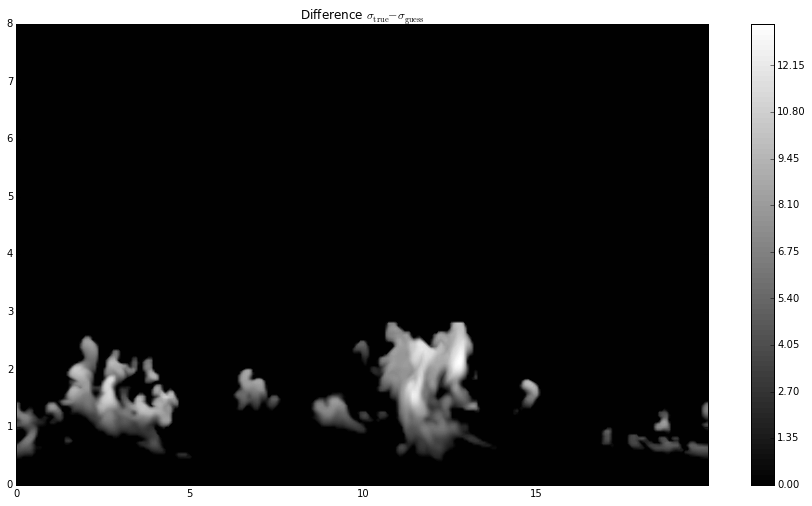

In [11]:
# Make a figure to plot the true extinction field
f0 = plt.figure(0, (15,8), facecolor='white')
ax0 = f0.add_axes([.1, .1, .8, .8])

fvals = adj_ext_true - adj_ext

contour0 = ax0.contourf(adj_x, adj_z, fvals, 100, cmap=cm.gray)
ax0.set_ybound((0,8))
ax0.set_title("Difference $\sigma_{\mathrm{true}} - \sigma_{\mathrm{guess}}$")
f0.colorbar(contour0, ax=ax0)

<matplotlib.colorbar.Colorbar instance at 0x643f638>

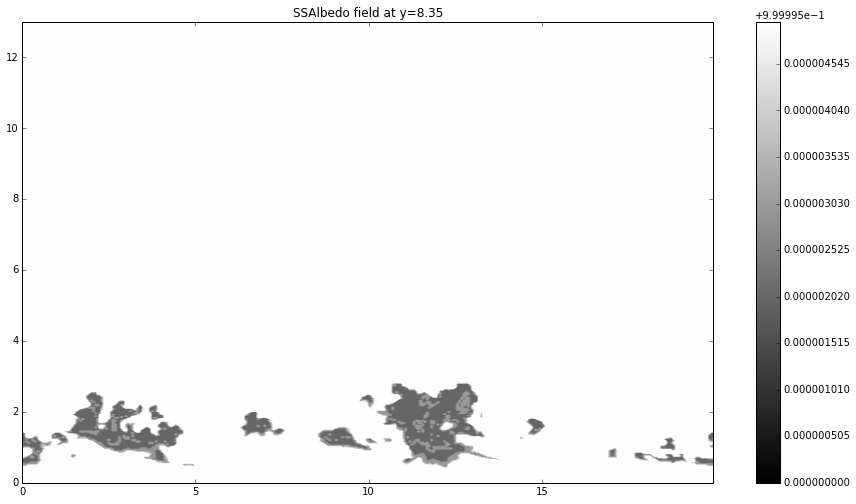

In [12]:
# Make a figure to plot the true single-scattering albedo field
f1 = plt.figure(1, (15,8), facecolor='white')
ax1 = f1.add_axes([.1, .1, .8, .8])


levels = np.linspace(.999995, 1, 100)
contour1 = ax1.contourf(adj_x, adj_z, adj_alb, levels=levels, cmap=cm.gray)
ax1.set_ybound((0,13))
ax1.set_title("SSAlbedo field at y=8.35")
f1.colorbar(contour1, ax=ax1)


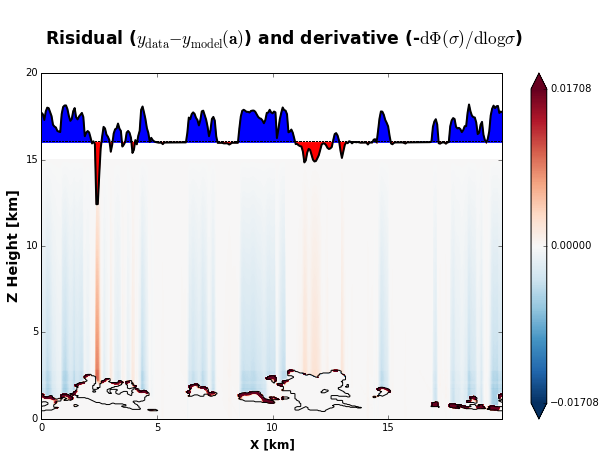

In [13]:
# Make a figure to plot the true single-scattering albedo field
f2 = plt.figure(1, (10,6), facecolor='white')
ax2 = f2.add_axes([.1, .1, .8, .8])


fvals = adj_dMFdext * mask_clouds * DZscale * adj_ext# * .1 * adj_ext
fmax = abs(fvals).max() / 20.
levels = np.linspace(-fmax, fmax, 400)

contour2 = ax2.contourf(adj_x, adj_z, fvals, levels=levels, cmap=cm.RdBu_r, extend="both") #levels=linspace(-16, 16, 100),
contour2a = ax2.contour(adj_x, adj_z, cloud_outline, 1, cmap=cm.gray) #levels=linspace(-16, 16, 100),
#contour2b = ax2.contourf(adj_x, adj_z, cloud_outline * fvals, 10 , cmap=cm.RdBu_r, linewidth=3) #levels=linspace(-16, 16, 100),


# Add the residual to the plot
ftrans = lambda y: 200 * y + .8*H 
plot_overlay_origin = ftrans(0 * adj_residual)
plot_overlay_arad = ftrans(adj_residual)
plot_res_pos = ax2.fill_between(adj_x[:,0], plot_overlay_origin, plot_overlay_arad, 
                             where=(plot_overlay_origin<plot_overlay_arad), 
                             color='b')#, linewidth=3)
plot_res_neg = ax2.fill_between(adj_x[:,0], plot_overlay_origin, plot_overlay_arad, 
                             where=(plot_overlay_origin>plot_overlay_arad), 
                             color='r',)#, linewidth=3)
plot_res_line = ax2.plot(adj_x[:,0], plot_overlay_arad, 'k', linewidth=2)
plot_origin = ax2.plot(adj_x[:,0], plot_overlay_origin, 'k,', linewidth=1)
ax2.set_ybound((0,H))
ax2.set_ylabel("Z Height [km]", fontsize='x-large', fontweight='bold')
ax2.set_xlabel('X [km]', fontsize='large', fontweight='bold')
ax2.set_title("""
    Risidual ($y_{\mathrm{data}} - y_{\mathrm{model}}(\mathbf{a})$) and derivative (-$\mathrm{d}\Phi(\sigma) / \mathrm{d}\log\sigma$)
    """, fontsize='xx-large', fontweight='bold')
cb = f2.colorbar(contour2, ax=ax2)
cb.set_ticks([-fmax, 0, fmax])

f2.savefig("adjoint-derivative-single-scattering.jpg", dpi=300)

#cb.set_ticklabels(['-2', '-1', '0', '1', '2'])

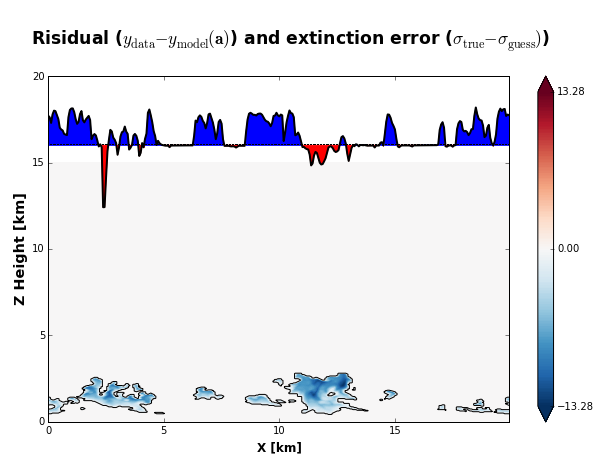

In [14]:
# Make a figure to plot the true single-scattering albedo field
f2 = plt.figure(1, (10,6), facecolor='white')
ax2 = f2.add_axes([.1, .1, .8, .8])


fvals = -adj_dMFdext * mask_clouds * DZscale * adj_ext# * .1 * adj_ext

fvals = - (adj_ext_true - adj_ext) #* adj_ext

fmax = abs(fvals).max() / 1.
levels = np.linspace(-fmax, fmax, 200)

contour2 = ax2.contourf(adj_x, adj_z, fvals, levels=levels, cmap=cm.RdBu_r, extend="both") #levels=linspace(-16, 16, 100),
contour2a = ax2.contour(adj_x, adj_z, cloud_outline, 1, cmap=cm.gray) #levels=linspace(-16, 16, 100),
#contour2b = ax2.contourf(adj_x, adj_z, cloud_outline * fvals, 10 , cmap=cm.RdBu_r, linewidth=3) #levels=linspace(-16, 16, 100),


# Add the residual to the plot
ftrans = lambda y: 200 * y + .8*H 
plot_overlay_origin = ftrans(0 * adj_residual)
plot_overlay_arad = ftrans(adj_residual)
plot_res_pos = ax2.fill_between(adj_x[:,0], plot_overlay_origin, plot_overlay_arad, 
                             where=(plot_overlay_origin<plot_overlay_arad), 
                             color='b')#, linewidth=3)
plot_res_neg = ax2.fill_between(adj_x[:,0], plot_overlay_origin, plot_overlay_arad, 
                             where=(plot_overlay_origin>plot_overlay_arad), 
                             color='r',)#, linewidth=3)
plot_res_line = ax2.plot(adj_x[:,0], plot_overlay_arad, 'k', linewidth=2)
plot_origin = ax2.plot(adj_x[:,0], plot_overlay_origin, 'k,', linewidth=1)
ax2.set_ybound((0,H))
ax2.set_ylabel("Z Height [km]", fontsize='x-large', fontweight='bold')
ax2.set_xlabel('X [km]', fontsize='large', fontweight='bold')
ax2.set_title("""
    Risidual ($y_{\mathrm{data}} - y_{\mathrm{model}}(\mathbf{a})$) and extinction error ($\sigma_{\mathrm{true}}-\sigma_{\mathrm{guess}})$)
    """, fontsize='xx-large', fontweight='bold')
cb = f2.colorbar(contour2, ax=ax2)
cb.set_ticks([-fmax, 0, fmax])

f2.savefig("adjoint-extinction-difference-and-residual.jpg", dpi=300)

#cb.set_ticklabels(['-2', '-1', '0', '1', '2'])

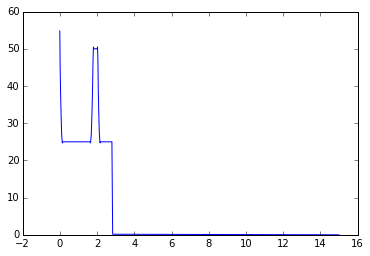

In [15]:

plot(Zscale, DZscale)